# Context:
    
The dataset contains 1000 entries with 20 categorial/symbolic attributes prepared by Prof. Hofmann. In this dataset, 
each entry represents a person who takes a credit by a bank. Each person is classified as good or bad credit risks according to 
the set of attributes. The link to the dataset can be found below.

# Dataset:
https://www.kaggle.com/renaldydermawan25/credit-data/version/1

# Some Attribute information:
    
Age (numeric)

Sex (text: male, female)

Job (numeric: 0 - unskilled and non-resident, 1 - unskilled and resident, 2 - skilled, 3 - highly skilled)

Housing (text: own, rent, or free)

Saving accounts (text - little, moderate, quite rich, rich)

Checking account (numeric, in DM - Deutsch Mark)

Credit amount (numeric, in DM)

Duration (numeric, in month)

Purpose (text: car, furniture/equipment, radio/TV, domestic appliances, repairs, education, business, vacation/others)

# Objective:
    
To Guage Feature Importance

In [1]:
# Import important library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
# from IPython.core.interactiveshell import InteractiveShell
# InteractiveShell.ast_node_interactivity = "all"

In [3]:
#Read input file and understand the data
# "default" is my dependent variable
df_pre = pd.read_csv("credit_data.csv")

In [4]:
df_pre.shape

(1000, 21)

In [5]:
df_pre.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
default                       1000 non-null int64
account_check_status          1000 non-null object
duration_in_month             1000 non-null int64
credit_history                1000 non-null object
purpose                       1000 non-null object
credit_amount                 1000 non-null int64
savings                       1000 non-null object
present_emp_since             1000 non-null object
installment_as_income_perc    1000 non-null int64
personal_status_sex           1000 non-null object
other_debtors                 1000 non-null object
present_res_since             1000 non-null int64
property                      1000 non-null object
age                           1000 non-null int64
other_installment_plans       1000 non-null object
housing                       1000 non-null object
credits_this_bank             1000 non-null int64
job                           1000

In [6]:
df_pre.head()

,default,account_check_status,duration_in_month,credit_history,purpose,credit_amount,savings,present_emp_since,installment_as_income_perc,personal_status_sex,...,present_res_since,property,age,other_installment_plans,housing,credits_this_bank,job,people_under_maintenance,telephone,foreign_worker
0,0,< 0 DM,6,critical account/ other credits existing (not ...,domestic appliances,1169,unknown/ no savings account,.. >= 7 years,4,male : single,...,4,real estate,67,none,own,2,skilled employee / official,1,"yes, registered under the customers name",yes
1,1,0 <= ... < 200 DM,48,existing credits paid back duly till now,domestic appliances,5951,... < 100 DM,1 <= ... < 4 years,2,female : divorced/separated/married,...,2,real estate,22,none,own,1,skilled employee / official,1,none,yes
2,0,no checking account,12,critical account/ other credits existing (not ...,(vacation - does not exist?),2096,... < 100 DM,4 <= ... < 7 years,2,male : single,...,3,real estate,49,none,own,1,unskilled - resident,2,none,yes
3,0,< 0 DM,42,existing credits paid back duly till now,radio/television,7882,... < 100 DM,4 <= ... < 7 years,2,male : single,...,4,if not A121 : building society savings agreeme...,45,none,for free,1,skilled employee / official,2,none,yes
4,1,< 0 DM,24,delay in paying off in the past,car (new),4870,... < 100 DM,1 <= ... < 4 years,3,male : single,...,4,unknown / no property,53,none,for free,2,skilled employee / official,2,none,yes


In [7]:
df_pre.columns

Index(['default', 'account_check_status', 'duration_in_month',
       'credit_history', 'purpose', 'credit_amount', 'savings',
       'present_emp_since', 'installment_as_income_perc',
       'personal_status_sex', 'other_debtors', 'present_res_since', 'property',
       'age', 'other_installment_plans', 'housing', 'credits_this_bank', 'job',
       'people_under_maintenance', 'telephone', 'foreign_worker'],
      dtype='object')

In [8]:
# Randomly select 50% data for this use case
from sklearn.model_selection import train_test_split
out_data,df = train_test_split(df_pre, train_size = 0.5, random_state = 5)
df_pre.shape
df_pre.columns
df_pre.head(5)

,default,account_check_status,duration_in_month,credit_history,purpose,credit_amount,savings,present_emp_since,installment_as_income_perc,personal_status_sex,...,present_res_since,property,age,other_installment_plans,housing,credits_this_bank,job,people_under_maintenance,telephone,foreign_worker
0,0,< 0 DM,6,critical account/ other credits existing (not ...,domestic appliances,1169,unknown/ no savings account,.. >= 7 years,4,male : single,...,4,real estate,67,none,own,2,skilled employee / official,1,"yes, registered under the customers name",yes
1,1,0 <= ... < 200 DM,48,existing credits paid back duly till now,domestic appliances,5951,... < 100 DM,1 <= ... < 4 years,2,female : divorced/separated/married,...,2,real estate,22,none,own,1,skilled employee / official,1,none,yes
2,0,no checking account,12,critical account/ other credits existing (not ...,(vacation - does not exist?),2096,... < 100 DM,4 <= ... < 7 years,2,male : single,...,3,real estate,49,none,own,1,unskilled - resident,2,none,yes
3,0,< 0 DM,42,existing credits paid back duly till now,radio/television,7882,... < 100 DM,4 <= ... < 7 years,2,male : single,...,4,if not A121 : building society savings agreeme...,45,none,for free,1,skilled employee / official,2,none,yes
4,1,< 0 DM,24,delay in paying off in the past,car (new),4870,... < 100 DM,1 <= ... < 4 years,3,male : single,...,4,unknown / no property,53,none,for free,2,skilled employee / official,2,none,yes


In [9]:
# Lets build a Ensemble model but need to modify the dataset first
obj_df=df.select_dtypes(include=['object'])
obj_df.head()

,account_check_status,credit_history,purpose,savings,present_emp_since,personal_status_sex,other_debtors,property,other_installment_plans,housing,job,telephone,foreign_worker
544,no checking account,critical account/ other credits existing (not ...,car (new),... < 100 DM,.. >= 7 years,male : single,none,real estate,none,own,unskilled - resident,none,yes
515,< 0 DM,critical account/ other credits existing (not ...,car (new),... < 100 DM,4 <= ... < 7 years,female : divorced/separated/married,none,if not A121 : building society savings agreeme...,none,own,skilled employee / official,none,no
193,no checking account,existing credits paid back duly till now,domestic appliances,... < 100 DM,4 <= ... < 7 years,male : married/widowed,none,real estate,none,rent,skilled employee / official,none,yes
11,< 0 DM,existing credits paid back duly till now,business,... < 100 DM,... < 1 year,female : divorced/separated/married,none,if not A121 : building society savings agreeme...,none,rent,skilled employee / official,none,yes
279,no checking account,existing credits paid back duly till now,domestic appliances,100 <= ... < 500 DM,1 <= ... < 4 years,male : single,none,"if not A121/A122 : car or other, not in attrib...",none,rent,management/ self-employed/ highly qualified em...,"yes, registered under the customers name",yes


In [10]:
dff=pd.get_dummies(df, drop_first=True)

In [11]:
dff.shape

(500, 49)

In [12]:
# Lets check for highly correlated variables
cor=dff.corr()
cor.loc[:,:] = np.tril(cor,k=-1)
cor=cor.stack()
cor[(cor > 0.55) | (cor < -0.55)]

credit_amount                                            duration_in_month                                                             0.583234
credit_history_existing credits paid back duly till now  credit_history_critical account/ other credits existing (not at this bank)   -0.670328
savings_unknown/ no savings account                      savings_... < 100 DM                                                         -0.609828
other_debtors_none                                       other_debtors_guarantor                                                      -0.690725
housing_rent                                             housing_own                                                                  -0.756613
job_unskilled - resident                                 job_skilled employee / official                                              -0.661808
dtype: float64

In [13]:
#Drop irrelavent data
dff=dff.drop(["foreign_worker_yes","job_unskilled - resident","housing_rent"],axis=1)

In [14]:
# Split Train/Test data 70:30 ratio
from sklearn.model_selection import train_test_split

y = dff['default']
X = dff.loc[:, dff.columns != 'default']

X_train, X_test, y_train, y_test = train_test_split (X, y, test_size=0.3, random_state=42,)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((350, 45), (150, 45), (350,), (150,))

In [15]:
#Build RF Model
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_jobs=2,n_estimators=500,criterion="entropy",random_state=9999)
rfm = rf.fit(X_train, y_train)

In [16]:
# !pip install imblearn

In [17]:
import sklearn.utils
from imblearn.over_sampling import SMOTE

In [20]:
upsampler = SMOTE(random_state=7, k_neighbors=10)

In [22]:
X_train_upsampled, y_train_upsampled = upsampler.fit_resample(X_train, y_train)

In [44]:
X_train_upsampled

,duration_in_month,credit_amount,installment_as_income_perc,present_res_since,age,credits_this_bank,people_under_maintenance,account_check_status_< 0 DM,account_check_status_>= 200 DM / salary assignments for at least 1 year,account_check_status_no checking account,...,other_debtors_none,"property_if not A121/A122 : car or other, not in attribute 6",property_real estate,property_unknown / no property,other_installment_plans_none,other_installment_plans_stores,housing_own,job_skilled employee / official,job_unemployed/ unskilled - non-resident,"telephone_yes, registered under the customers name"
0,36,8086,2,4,42,4,1,0,0,0,...,1,1,0,0,1,0,1,0,0,1
1,45,4746,4,2,25,2,1,0,0,0,...,1,0,0,0,1,0,1,0,0,0
2,8,1164,3,4,51,2,2,1,0,0,...,1,0,0,1,0,0,0,0,0,1
3,9,1391,2,1,27,1,1,0,0,0,...,1,0,1,0,0,0,1,1,0,1
4,9,745,3,2,28,1,1,0,1,0,...,1,0,1,0,1,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
529,23,3612,2,3,30,2,1,0,0,0,...,0,0,0,0,1,0,1,1,0,0
530,32,4011,3,3,44,1,1,0,0,0,...,1,0,0,0,1,0,0,1,0,0
531,10,1307,3,3,27,1,1,0,0,0,...,0,0,0,0,1,0,1,0,0,0
532,35,5167,3,2,29,1,1,1,0,0,...,1,0,0,0,1,0,0,1,0,0


In [43]:
y_train_upsampled.value_counts()

1    267
0    267
Name: default, dtype: int64

In [18]:
preds = rf.predict_proba(X_test)[:,1]
y_pred = rf.predict(X_test)

In [64]:
# Calculate Confusion Matrix

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
def calculate_confusion_matrix(y_true, y_pred):
    cm=confusion_matrix(y_true, y_pred)
    print(cm)

In [65]:
calculate_confusion_matrix(y_test, y_pred)
print(accuracy_score(y_test, y_pred))

[[96  0]
 [43 11]]
0.7133333333333334


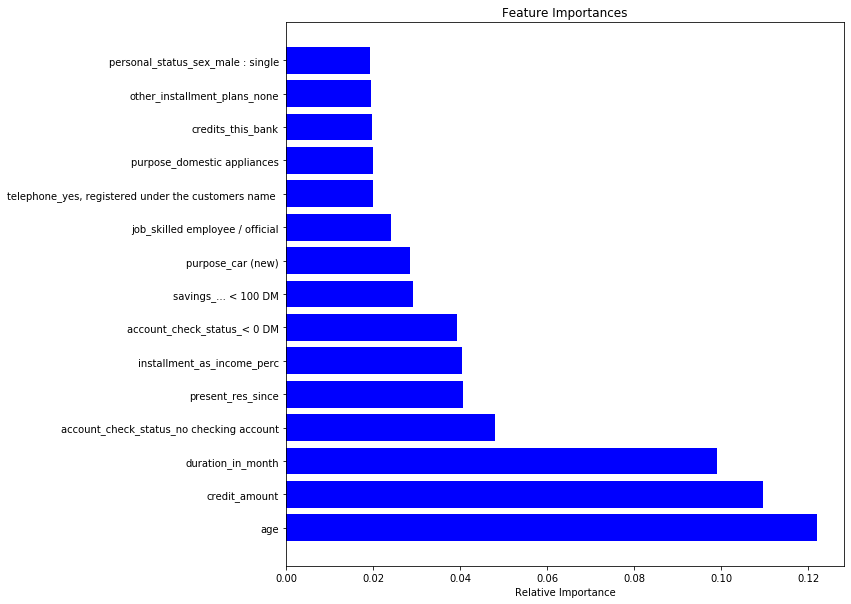

In [66]:
# View a list of the features and their importance scores
importances = rf.feature_importances_
indices = np.argsort(importances)[::-1][:15]
a = dff.columns[:]
features= a.drop('default',1)
#plot it
plt.figure(figsize=(10,10))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), features[indices])
plt.xlabel('Relative Importance')
plt.show()

In [20]:
trainResult = rf.score(X_train, y_train)
testResult = rf.score(X_test, y_test)

In [34]:
"Train Accuracy:"
(trainResult*100.0)

100.0

In [35]:
"Test Accuracy:"
(testResult*100.0)

71.33333333333334

# K-fold cross-validation

k-fold cross validation( without stratification)

Usually k is set as 10-20 in practical settings, depends on data set size

In [46]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [47]:
num_folds = 10
seed = 77

In [48]:
kfold = KFold(n_splits=num_folds, random_state=seed)

In [49]:
results = cross_val_score(rfm, X_train_upsampled, y_train_upsampled, cv=kfold)
results

array([0.68518519, 0.72222222, 0.7962963 , 0.81481481, 0.81132075,
       0.79245283, 0.94339623, 1.        , 1.        , 0.98113208])

In [50]:
np.mean(abs(results))

0.8546820405310973

In [51]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [52]:
num_folds = 10
seed = 77

In [53]:
kfold = KFold(n_splits=num_folds, random_state=seed)

In [54]:
results = cross_val_score(rfm, X_train_upsampled, y_train_upsampled, cv=kfold)
results

array([0.68518519, 0.72222222, 0.7962963 , 0.81481481, 0.81132075,
       0.79245283, 0.94339623, 1.        , 1.        , 0.98113208])

In [55]:
np.mean(abs(results))

0.8546820405310973

In [56]:
results.std()

0.110959538023544

Leave One Out Cross-Validation

In [57]:
from sklearn.model_selection import LeaveOneOut
from sklearn.model_selection import cross_val_score

In [98]:
# A single Validation set is used to reduce overfitting
# Many validation sets is used to reduce sampling noise

In [58]:
# You Will do it on X_train, y_train to save time. It will take too much time, hence not recommended for bigger data
# LOOCV will be used when you cannot afford to leave out large sums of data
# KFold is used on large dataset where you can offord to leave out large sums of data

# LOOCV is like a KFold where K = N (number of data points)
scores = cross_val_score(rfm, X_train_upsampled, y_train_upsampled, cv=LeaveOneOut())
scores

array([0., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0.,
       0., 0., 0., 0., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 0., 1., 0., 1., 1., 1., 0., 0., 1., 0., 1.,
       1., 0., 0., 1., 1., 0., 0., 1., 1., 1., 1., 0., 1., 0., 1., 0., 1.,
       0., 0., 1., 1., 0., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 0., 1., 0., 1., 0., 1., 1., 1., 0., 0., 1., 1., 0.,
       0., 1., 0., 1., 1., 1., 1., 1., 0., 1., 0., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 0.,
       0., 1., 1., 0., 0., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 0., 0., 1., 1., 1., 1., 1., 1., 0., 1., 1.,
       1., 1., 1., 1., 0., 1., 0., 1., 1., 1., 1., 1., 1., 0., 1., 0., 1.,
       1., 1., 1., 1., 1., 0., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1.,
       1., 0., 1., 1., 0., 0., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1.,
       1., 1., 1., 1., 1.

Because we have 350 samples, the leave one out cross-validation yields scores for 350 trials, and the score indicates either 
defaulter (1.0) or non-defaulter (0.0) prediction. Taking the mean of these gives an estimate of the error rate:

In [59]:
scores.mean()

0.8576779026217228

In [60]:
scores.std()

0.3493801911616131

# Stratified cross-validation (Bonus)

k-fold cross validation with stratification

In [63]:
k = 10
from sklearn.model_selection  import StratifiedKFold, cross_val_score
stratified_kfold = StratifiedKFold(n_splits = k, random_state = 55)
results = cross_val_score(rfm, X_train_upsampled, y_train_upsampled, cv = stratified_kfold)

In [64]:
print('Accuracy Score')
print('Avearge: ', results.mean())
print('Standard deviation: ', results.std())

Accuracy Score
Avearge:  0.8531446540880504
Standard deviation:  0.1432258706744277


# Bootstrapping (Bonus)

Given a dataset of size n, a bootstrap sample is created by sampling n instances uniformly from the data 
(with/without replacement)

Create a model with each bootstrap sample and validate it with the test set

Final result is calculated by averaging the accuracy of models

In [65]:
# Number of iterations for bootstrapping
bootstrap_iteration = 10
accuracy = []

In [66]:
from sklearn.utils import resample
from sklearn.metrics import accuracy_score

for i in range(bootstrap_iteration):
    X_, y_ = resample(X_train_upsampled, y_train_upsampled)
    rfm.fit(X_, y_)
    y_pred = rfm.predict(X_test)
    
    acc = accuracy_score(y_pred, y_test)
    accuracy.append(acc)

In [67]:
accuracy = np.array(accuracy)
print('Accuracy Score')
print('Avearge: ', accuracy.mean())
print('Standard deviation: ', accuracy.std())

Accuracy Score
Avearge:  0.708
Standard deviation:  0.011850925889754116


Inference:

Here crossfold validation with stratification gives better result than Bootstrapping.